In [146]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [147]:
img = cv2.imread('./dataset/Kane Williamson/kane_(84).jpg')
img.shape

(612, 418, 3)

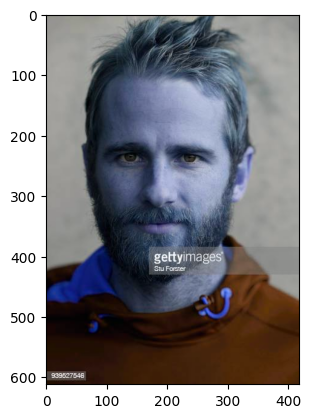

In [148]:
plt.imshow(img)

In [149]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(612, 418)

In [150]:
gray

array([[142, 142, 142, ..., 142, 141, 141],
       [142, 142, 143, ..., 142, 141, 141],
       [142, 143, 143, ..., 142, 141, 141],
       ...,
       [ 14,  14,  14, ...,  33,  33,  33],
       [ 14,  14,  14, ...,  33,  33,  33],
       [ 14,  14,  14, ...,  33,  33,  33]], dtype=uint8)

In [151]:
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 52, 135, 271, 271]], dtype=int32)

In [152]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(52), np.int32(135), np.int32(271), np.int32(271))

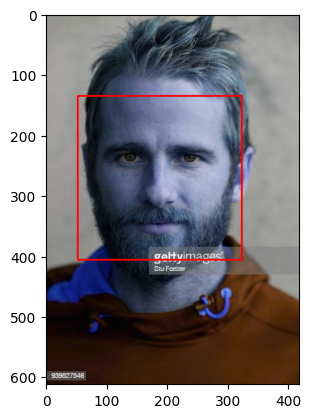

In [153]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

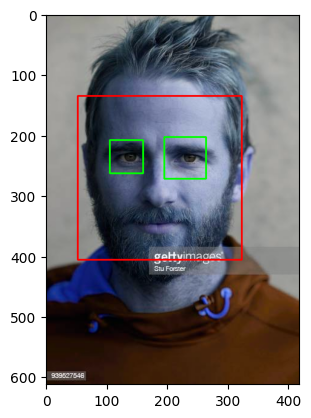

In [154]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

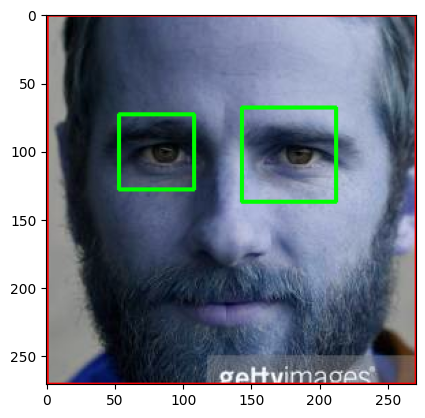

In [155]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [156]:
cropped_img = np.array(roi_color)
cropped_img.shape

(271, 271, 3)

In [157]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

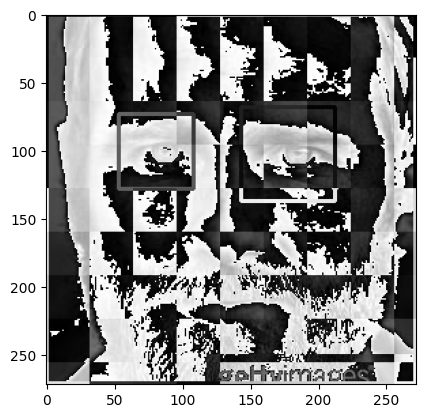

In [158]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [159]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

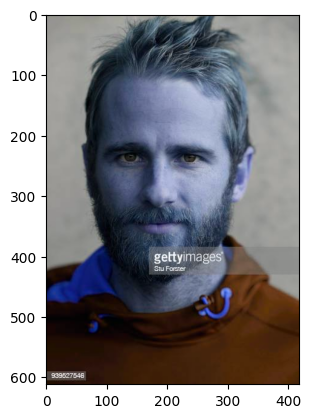

In [160]:
original_image = cv2.imread('./dataset/Kane Williamson/kane_(84).jpg')
plt.imshow(original_image)

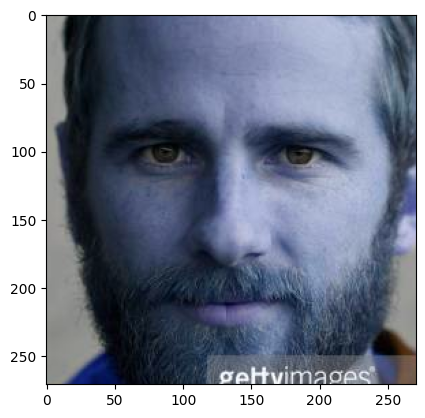

In [161]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/Kane Williamson/kane_(84).jpg')
plt.imshow(cropped_image)

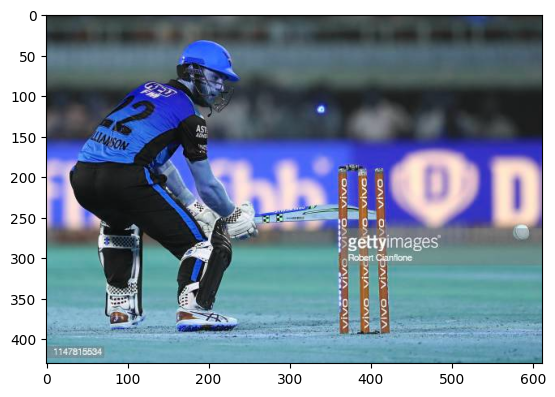

In [162]:
org_image_obstructed = cv2.imread('./dataset/kane Williamson/kane_(89).jpg')
plt.imshow(org_image_obstructed)

In [163]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./dataset/kane Williamson/kane_(89).jpg')
cropped_image_no_2_eyes

In [164]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [165]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [166]:
img_dirs

['./dataset/cristiano_ronaldo',
 './dataset/Kane Williamson',
 './dataset/Kobe Bryant',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [167]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [200]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cristiano_ronaldo
Generating cropped images in folder:  ./dataset/cropped/cristiano_ronaldo
Kane Williamson
Generating cropped images in folder:  ./dataset/cropped/Kane Williamson
Kobe Bryant
Generating cropped images in folder:  ./dataset/cropped/Kobe Bryant
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [201]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo10.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo11.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo12.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo13.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo14.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo15.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo16.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo17.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo18.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo19.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo2.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo20.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo21.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo

In [215]:
celebrity_file_names_dict

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo10.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo11.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo12.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo13.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo14.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo15.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo16.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo17.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo18.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo19.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo2.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo20.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo21.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo

In [224]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano_ronaldo': 0,
 'Kane Williamson': 1,
 'Kobe Bryant': 2,
 'lionel_messi': 3,
 'maria_sharapova': 4,
 'roger_federer': 5,
 'serena_williams': 6,
 'virat_kohli': 7}

In [225]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',7)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 7 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [226]:
len(X)

332

In [227]:
32*32*3 + 32*32

4096

In [228]:
X[0]

array([[ 57],
       [ 56],
       [ 58],
       ...,
       [197],
       [199],
       [193]], dtype=uint8)

In [174]:
y[0]

0

In [229]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(332, 4096)

In [221]:
X[0]

array([ 57.,  56.,  58., ..., 197., 199., 193.])

In [230]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7469879518072289

In [236]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76        20
           1       0.00      0.00      0.00         1
           2       0.50      0.50      0.50         4
           3       0.69      0.64      0.67        14
           4       0.87      0.87      0.87        23
           5       1.00      0.29      0.44         7
           6       0.88      0.78      0.82         9
           7       1.00      0.60      0.75         5

    accuracy                           0.75        83
   macro avg       0.70      0.58      0.60        83
weighted avg       0.77      0.75      0.73        83



c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [237]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [248]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [10,100,1000,10000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [10,50,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [10,50,100]
        }
    }
}

In [249]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Pytho

,model,best_score,best_params
0,svm,0.679020,"{'svc__C': 10, 'svc__kernel': 'linear'}"
1,random_forest,0.618531,{'randomforestclassifier__n_estimators': 100}
2,logistic_regression,0.650531,{'logisticregression__C': 10}


In [250]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=10, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, multi_class='auto',
                                     solver='liblinear'))])}

In [251]:
best_estimators['svm'].score(X_test,y_test)

0.7469879518072289

In [252]:
best_estimators['random_forest'].score(X_test,y_test)

0.6506024096385542

In [253]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7108433734939759

In [254]:
best_clf = best_estimators['svm']

In [255]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[18,  0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  2,  1,  0,  1,  0,  0],
       [ 3,  1,  0,  8,  0,  1,  1,  0],
       [ 1,  0,  1,  2, 18,  0,  1,  0],
       [ 2,  0,  0,  1,  0,  4,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  5]])

Text(95.72222222222221, 0.5, 'Truth')

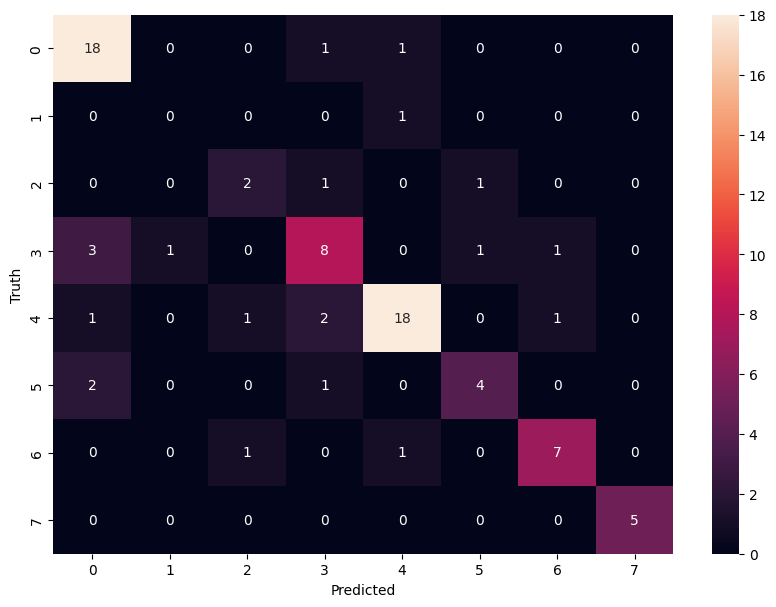

In [256]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [247]:
class_dict

{'cristiano_ronaldo': 0,
 'Kane Williamson': 1,
 'Kobe Bryant': 2,
 'lionel_messi': 3,
 'maria_sharapova': 4,
 'roger_federer': 5,
 'serena_williams': 6,
 'virat_kohli': 7}

In [257]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [258]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))